# <center>**Data Science Project**</center>



# 1. Business Understanding

Business Understanding part of our problem which basically addresses the following questions.

   1. What is the business problem that you are trying to solve?
   2. What data do you need to answer the above problem?
   3. What are the different sources of data?    
   4. What kind of analytics task are you performing?

# 2. Data Acquisition

 For the problem identified , We found an appropriate data set from public data source [**UCI Machine Learning Repository**] [DataSet
 ](https://archive.ics.uci.edu/dataset/2/adult).

---



## 2.1 Download the data directly



In [32]:
#Downloading the dataset
!pip install wget
import wget
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2023-11-11 14:14:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘adult.data.1’

adult.data.1            [   <=>              ]   3.79M  7.43MB/s    in 0.5s    

2023-11-11 14:14:39 (7.43 MB/s) - ‘adult.data.1’ saved [3974305]



## 2.2 Code for converting the above downloaded data into a dataframe

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [34]:
#Converting Downloaded data into DataFrame
df = pd.read_csv('adult.data', header=None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])

## 2.3 Confirm the data has been correctly by displaying the first 5 and last 5 records.

In [35]:
#Display the first 5 records
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [36]:
#Display the last 5 records
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [37]:
# display column headings
print(df.columns)

# display statistical information
print(df.describe())

# display description
print(df.info())

# display statistical summary
print(df.describe(include='all'))

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
cou

## 2.5 Our observations from the above.
1. Size of the dataset
2. What type of data attributes are there?
3. Is there any null data that has to be cleaned?

# 3. Data Preparation

## 3.1 Check for

* duplicate data
* missing data
* data inconsistencies


In [38]:
# check for duplicate data
duplicate_data = df[df.duplicated()]
if duplicate_data.empty:
    print('No duplicate data found')
else:
    print('Duplicate data:\n', duplicate_data)

Duplicate data:
        age          workclass  fnlwgt      education  education-num  \
4881    25            Private  308144      Bachelors             13   
5104    90            Private   52386   Some-college             10   
9171    21            Private  250051   Some-college             10   
11631   20            Private  107658   Some-college             10   
13084   25            Private  195994        1st-4th              2   
15059   21            Private  243368      Preschool              1   
17040   46            Private  173243        HS-grad              9   
18555   30            Private  144593        HS-grad              9   
18698   19            Private   97261        HS-grad              9   
21318   19            Private  138153   Some-college             10   
21490   19            Private  146679   Some-college             10   
21875   49            Private   31267        7th-8th              4   
22300   25            Private  195994        1st-4th        

In [39]:
# check for missing data
missing_data = df.isnull().sum().sum()
if missing_data == 0:
    print('No missing data found')
else:
    print('Missing data count:', missing_data)

# check for data inconsistencies
print('Checking for Data Inconsistency')
print(df['education'].unique())
print(df['marital-status'].unique())
print(df['occupation'].unique())
print(df['relationship'].unique())
print(df['race'].unique())
print(df['sex'].unique())
print(df['native-country'].unique())

No missing data found
Checking for Data Inconsistency
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
[' Male' ' Female']
[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thai

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [40]:
# Remove duplicate data
df = df.drop_duplicates()

In [41]:
pd.set_option('mode.chained_assignment', None)
#Trim space in values
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Impute or Remove missing data
# replace '?' with NaN - workclass
df.replace('?', np.nan, inplace=True)

# impute missing data for workclass using mode
mode_workclass = df['workclass'].mode()[0]
df['workclass'].fillna(mode_workclass, inplace=True)

# impute missing data for occupation using mode
mode_occupation = df['occupation'].mode()[0]
df['occupation'].fillna(mode_occupation, inplace=True)

# remove rows with missing values
df = df.dropna()

In [42]:
# Remove data inconsistencies for Education level Values
# define a mapping for inconsistent education levels
mapping = {' 12th': 'High School', ' 11th': 'High School', ' 9th': 'High School', ' 10th': 'High School',
           ' 7th-8th': 'Middle School', ' 5th-6th': 'Middle School', ' 1st-4th': 'Primary School'}

# replace inconsistent values with mapped values
df['education'].replace(mapping, inplace=True)

## 3.3 Encode categorical data

In [43]:
# select the categorical columns to encode
categorical_columns = df.select_dtypes(include="object").columns
categorical_codes_columns = list(map(lambda x: x+"_codes", categorical_columns))

# encode categorical columns using cat.codes
df[categorical_codes_columns] = df[categorical_columns].astype('category').apply(lambda x: x.cat.codes)

In [44]:
# display the encoded DataFrame
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  ...  \
0       Never-married       Adm-clerical  Not-in-family  White    Male  ...   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male  ...   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male  ...   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male  ...   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female  ...   

   income  workclass_codes  education_codes marital-status_codes  \
0   <=50K                6                9                    4   
1   <=50K       

## 3.4 Report

Mention and justify the method adopted
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present

1. To remove duplicate data, we have dropped the repetitive records. The use of drop_duplicates() is justified in this case because the presence of duplicate rows can distort analysis results and lead to inaccurate conclusions. Additionally, removing duplicates can improve computational efficiency, as the amount of data that needs to be processed reduces.

2. To remove missing data, the cells having values as ? were replaced with NaN (null value). Then we imputed the missing values with the mode value of the entire column. We have used the Mode measure of central tendency as it gives us the most probable value for that record cell. Moreover, for some features, the values are not numerical hence using the Median or Mean doesn't make sense. Also, using the Mode measure of central tendency helps in case of outliers or skewed data.

3. To remove data inconsistencies, we defined a mapping for inconsistent education levels. The feature Education data was not uniform and had values as text, Numeric, and intervals. So we made changes by mapping the wrong non-uniform values to the standard ones and made the values uniform throughout the feature. Mapping helps make all records consistent and help in comparing and analyzing accurately. Overall, defining a mapping is a way to ensure consistency and accuracy in your dataset, which is essential for making meaningful analyses and drawing valid conclusions.

## 3.5 Identify the target variables.

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

* Report the observations

In [45]:
# Separating the data in the form of (Features, Label)
X = df.drop('income', axis=1) # Features
y = (df['income'] == '>50K') # Label - Target variable (income)

# Since target variable is a binary variable, Encoding it as a binary variable, where 1 represents income greater than $50K
# and 0 represents income less than or equal to $50K.
y = df.income.apply(lambda x: 1 if x == '>50K' else 0)

# **Observations**
The Adult dataset can be separated from the target in the from of (Features, Label). Basically we are separating the target variable from the dataset.

The target variable in the Adult dataset is binary, indicating whether an individual's income is greater than $50K per year or not. The target variable has been encoded as a binary variable (0 or 1) in the above dataset, but it could also be one-hot encoded using the get_dummies function.

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

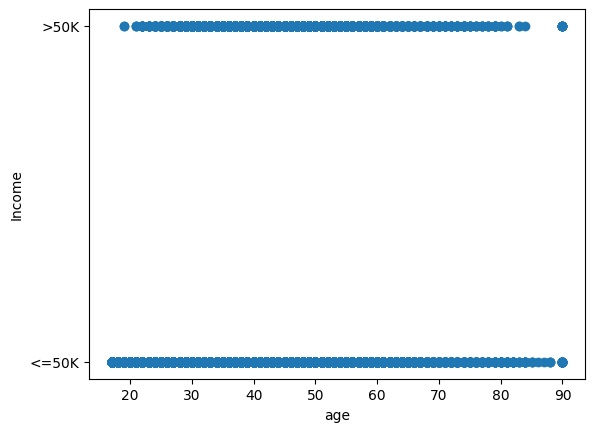

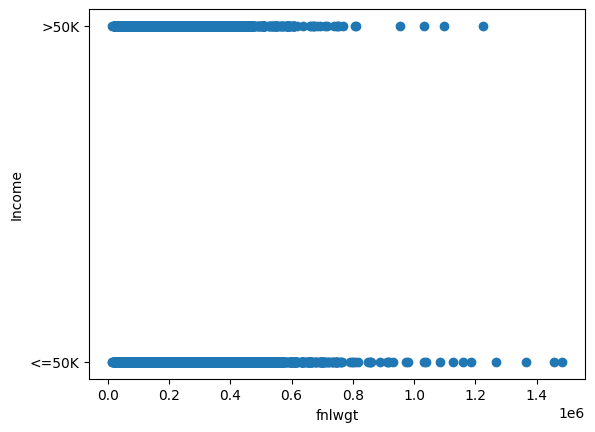

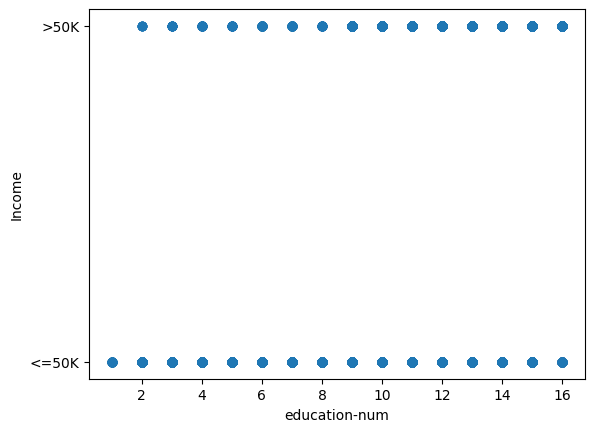

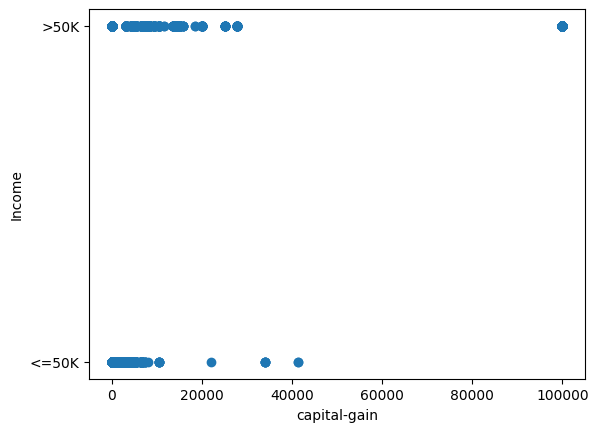

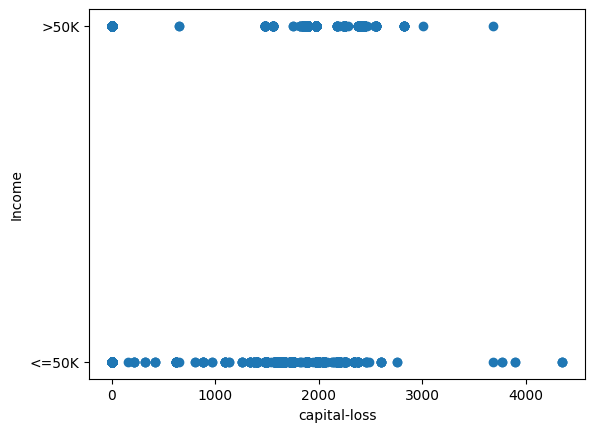

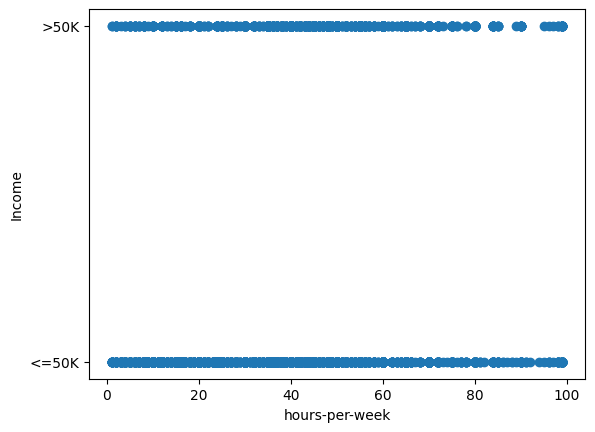

In [46]:
quantitative_attribute = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Create scatter plots of each quantitative attribute with the target variable
for col in quantitative_attribute:
    plt.scatter(df[col], df['income'])
    plt.xlabel(col)
    plt.ylabel('Income')
    plt.show()

## 4.2 EDA using visuals
* Use (minimum) 2 plots (pair plot, heat map, correlation plot, regression plot...) to identify the optimal set of attributes that can be used for classification.
* Name them, explain why you think they can be helpful in the task and perform the plot as well.

Plots which can be used to identify the optimal set of attributes that can be used for classification are:

1. **Pair Plot :** Pair plots allow us to visualize the relationships between multiple variables in a dataset. By plotting each pair of variables against each other, we can quickly identify patterns and trends in the data. It also helps us determine which variables are most strongly co-related and identify optimal candidates for classification.

2. **Correlation Plot :** Correlation plots can help us to identify strongly correlated variables. Variables with a high correlation coefficient (close to 1 or -1) are related strongly, while variables with a low correlation coefficient (close to 0) are not strongly related. By analyzing the correlation matrix, we can identify variables that might be optimal candidates for classification.

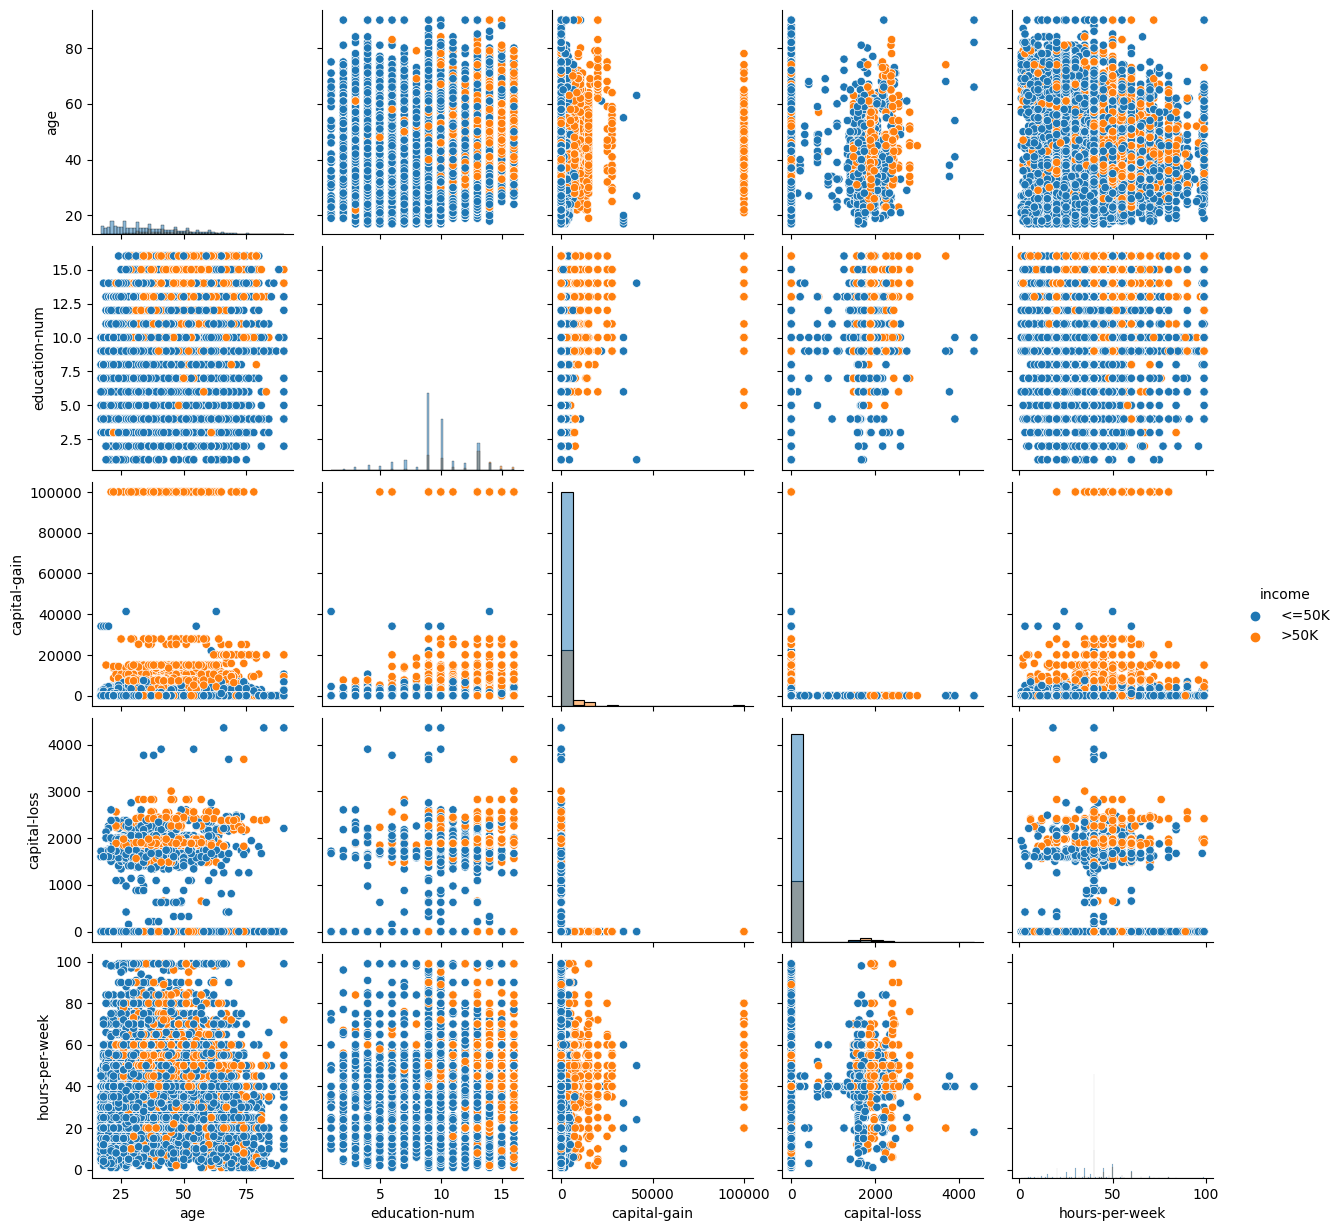

In [47]:
# Create the pair plot
sns.pairplot(data=df.drop(columns=['fnlwgt','workclass_codes', 'education_codes', 'marital-status_codes','occupation_codes', 'relationship_codes', 'race_codes', 'sex_codes',
       'native-country_codes', 'income_codes']), hue='income', diag_kind='hist')

<ipython-input-48-9170f147d170>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Axes: >

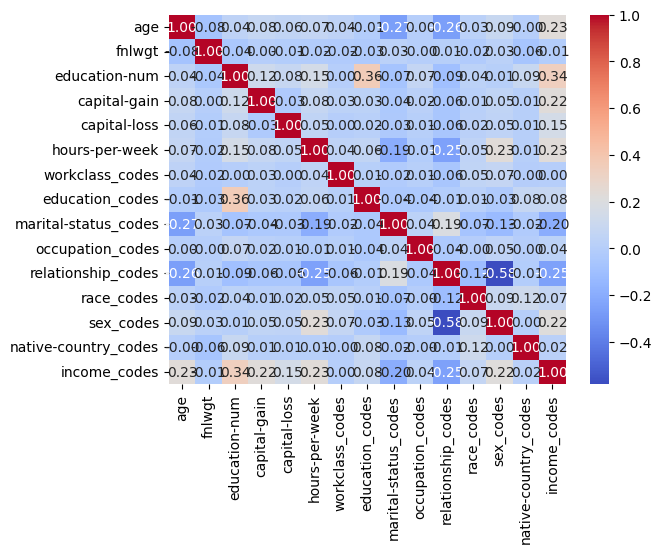

In [48]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create the correlation plot
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')

# 5. Data Wrangling



## 5.1 Univariate Filters

#### Numerical and Categorical Data
* Identify top 5 significant features by evaluating each feature independently with respect to the target variable by exploring
1. Mutual Information (Information Gain)
2. Gini index
3. Gain Ratio
4. Chi-Squared test
5. Fisher Score

In [49]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']
for column in categorical_columns:
    labelencoder = LabelEncoder()
    df[column] = labelencoder.fit_transform(df[column])

In [50]:
X = df.drop(columns=['income','workclass_codes', 'education_codes', 'marital-status_codes','occupation_codes', 'relationship_codes', 'race_codes', 'sex_codes',
       'native-country_codes', 'income_codes'], axis=1)
y = df['income']

In [51]:
mutual_info_scores = mutual_info_classif(X, y)
mutual_info_scores = pd.Series(mutual_info_scores, index=X.columns)
mutual_info_scores.sort_values(ascending=False, inplace=True)

In [52]:
means_0 = X[y == 0].mean()
means_1 = X[y == 1].mean()
vars_0 = X[y == 0].var()
vars_1 = X[y == 1].var()

# Calculate the Fisher Score for each feature
fisher_scores = ((means_0 - means_1) ** 2) / (vars_0 + vars_1)

# Rank the features based on their Fisher Scores
top_features = fisher_scores.sort_values(ascending=False)

top_5_mi = list(mutual_info_scores.index[:5])
top_5_fi=list(top_features.index[:5])
print("Top 5 features based on Mutual Information scores: ", top_5_mi)
print("Top 5 features based on Fisher scores: ", top_5_fi)

Top 5 features based on Mutual Information scores:  ['marital-status', 'relationship', 'education-num', 'age', 'capital-gain']
Top 5 features based on Fisher scores:  ['education-num', 'relationship', 'age', 'hours-per-week', 'sex']


## 5.2 Report observations

Our observations from the results of each method. Clearly justify your choice of the method.

**Mutual Information (Information Gain):** Mutual Information is a metric that measures the amount of information that one variable provides about another variable. In the context of feature selection, it is used to measure the amount of information that a feature provides about the target variable. So this can be a good method to identify top 5 significant features with respect to target variable.

**Fisher Score:** The Fisher Score measures the discriminative power of a feature by evaluating the difference between the class means and variances for each feature. This method takes into account both the dependence between the feature and the target variable, as well as the strength of the association. So, this also can be a good method to identify top 5 significant features with respect to target variable.

# Observations

The top 2 significant features identified by the MI method are 'relationship' and 'marital-status', whereas in the Fisher Score method, the top 2 features are 'education-num' and 'relationship'. This indicates that there is some overlap in the features identified as significant by both methods.

'age' and 'relationship' are among the top 5 features identified by both methods. This indicates that these features have a strong relationship with the target variable 'income' and are likely to be important in predicting it.

The MI method identified 'capital-gain' and 'education' as significant features, whereas the Fisher Score method identified 'hours-per-week' and 'sex'. This indicates that the two methods may have different strengths and weaknesses in identifying significant features based on their underlying assumptions and calculation methods.

Overall, both methods have identified age, relationship, and education-related features as significant, which is consistent with the domain knowledge about factors that influence income levels. Therefore, a combination of these features could be used to build a predictive model for the "adult" dataset.

# 6. Implement Machine Learning Techniques

Use any 2 ML algorithms
1. Classification -- Decision Tree classifier

2. Clustering -- kmeans

3. Association Analysis

4. Anomaly detection


## 6.1 ML technique 1 + Justification

In [53]:
X = df.drop(columns=['income','workclass_codes', 'education_codes', 'marital-status_codes','occupation_codes', 'relationship_codes', 'race_codes', 'sex_codes',
       'native-country_codes', 'income_codes'], axis=1)
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Decision Tree Classifier model
dtc = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
# Predict the income class of the individuals in the testing set
y_pred = dtc.predict(X_test)

# Justification for ML Technique 1 (Classification -- Decision Tree classifier)

Decision Tree Classifier is a popular supervised learning algorithm used for classification tasks. It is chosen for the Adult dataset because the dataset contains both categorical and numerical features, and Decision Tree can easily handle mixed data types. Moreover, the dataset has a binary target variable, i.e., income, which can be classified as either "<=50K" or ">50K". Decision Trees can efficiently classify such binary outcomes by recursively splitting the data into subsets based on the most significant features. The Decision Tree model can help in predicting the income class of an individual based on other attributes, such as age, education, occupation, etc.

## 6.2 ML technique 2 + Justification

In [55]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('income', axis=1))

# Apply K-Means algorithm to the preprocessed dataset
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get the cluster labels for each individual in the dataset
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


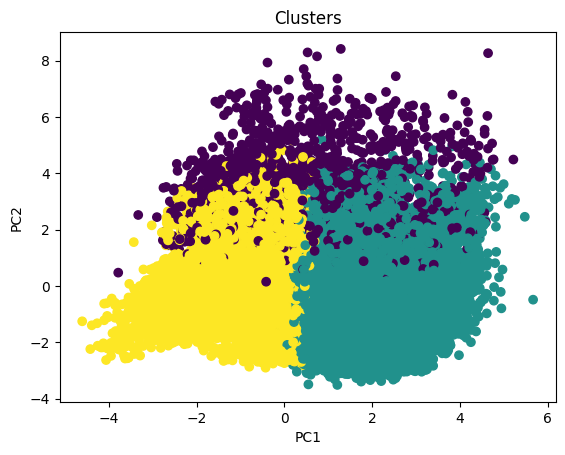

In [56]:
# Import necessary libraries for visualization
# Reduce the dimensionality of the dataset using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the clusters in a 2D space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title('Clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Justification for ML Technique 2 (Clustering - kmeans)

K-Means is an unsupervised learning algorithm used for clustering similar data points. It is chosen for the Adult dataset because clustering can help identify patterns and groups of individuals with similar attributes in the dataset. This information can be useful for marketing or demographic analysis. Additionally, K-Means can handle a large number of features and data points, making it ideal for the Adult dataset, which contains more than 30,000 records with multiple features. The K-Means algorithm can group individuals based on their similarities in age, education, work-class, etc., and create meaningful clusters that can provide insights into the data.

## 7. Conclusion

Compare the performance of the ML techniques used.

Derive values for preformance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC etc to compare the ML algos and plot them. A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, Word cloud etc as per the requirement of your application/problem.

In [57]:
# Evaluate the performance of the model - Classification -- Decision Tree classifier
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision Score: ',precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))
print('AUC-ROC score: ',roc_auc_score(y_test, y_pred))
print('Confusion Matrix:', confusion_matrix(y_test, y_pred))
print('Classification Report:', classification_report(y_test, y_pred))

Accuracy: 0.8069159755906744
Precision Score:  0.5925209542230819
Recall:  0.6042077580539119
F1 Score:  0.5983072916666667
AUC-ROC score:  0.7372168153719251
Confusion Matrix: [[4238  632]
 [ 602  919]]
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4870
           1       0.59      0.60      0.60      1521

    accuracy                           0.81      6391
   macro avg       0.73      0.74      0.74      6391
weighted avg       0.81      0.81      0.81      6391



In [58]:
# Evaluate the performance of the K-Means algorithm
silhouette_score = silhouette_score(X, labels)
davies_bouldin_score = davies_bouldin_score(X, labels)
calinski_harabasz_score = calinski_harabasz_score(X, labels)

print('Silhouette score: ', silhouette_score)
print('Davies-Bouldin score: ', davies_bouldin_score)
print('Calinski-Harabasz score: ', calinski_harabasz_score)

Silhouette score:  0.16130360988525616
Davies-Bouldin score:  2.0297779343913187
Calinski-Harabasz score:  3997.1518134753055


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

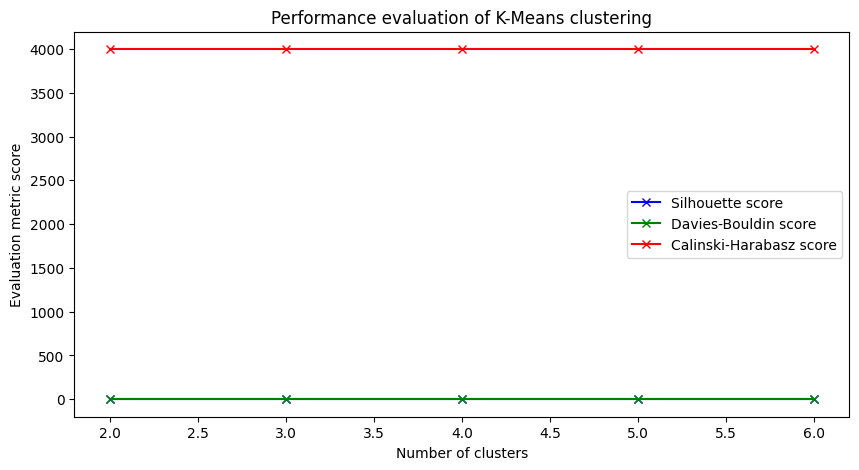

In [59]:
k_values = [2, 3, 4, 5, 6]

# Evaluate the performance of the K-Means algorithm for each K value
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score)
    davies_bouldin_scores.append(davies_bouldin_score)
    calinski_harabasz_scores.append(calinski_harabasz_score)

plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_scores, 'bx-', label='Silhouette score')
plt.plot(k_values, davies_bouldin_scores, 'gx-', label='Davies-Bouldin score')
plt.plot(k_values, calinski_harabasz_scores, 'rx-', label='Calinski-Harabasz score')
plt.xlabel('Number of clusters')
plt.ylabel('Evaluation metric score')
plt.title('Performance evaluation of K-Means clustering')
plt.legend()
plt.show()

## 8. Solution

Solution that is proposed to solve the business problem discussed in Section 1. Also our learnings while working through solving the problem in terms of challenges, observations, decisions made etc.